In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
import h5py
import torch


In [3]:
region='9999NEWS'
locations={ "train_test_datadir":"/project/spice/radiation/ML/CRM/data/models/datain",
            "chkpnt_loc":"/project/spice/radiation/ML/CRM/data/models/chkpts/torch",
            "hist_loc":"/project/spice/radiation/ML/CRM/data/models/history",
            "model_loc":"/project/spice/radiation/ML/CRM/data/models/torch",
            "normaliser_loc":"/project/spice/radiation/ML/CRM/data/models/normaliser/{0}".format(region)}

In [18]:
dataset_file = "{0}/train_test_data_levs_{1}_std.hdf5".format(locations["train_test_datadir"],region)
dataset=h5py.File(dataset_file,'r')
       
q_tot_train = dataset["q_tot_train"]
q_tot_adv_train = dataset["q_adv_train"]
theta_train = dataset["air_potential_temperature_train"]
theta_adv_train = dataset["t_adv_train"]
sw_toa_train = dataset["toa_incoming_shortwave_flux_train"]
shf_train = dataset["surface_upward_sensible_heat_flux_train"]
lhf_train = dataset["surface_upward_latent_heat_flux_train"]
theta_phys_train = dataset["t_phys_train"]
qphys_train = dataset["q_phys_train"]
q_tot_test = dataset["q_tot_test"]
q_tot_adv_test = dataset["q_adv_test"]
theta_test = dataset["air_potential_temperature_test"]
theta_adv_test = dataset["t_adv_test"]
sw_toa_test = dataset["toa_incoming_shortwave_flux_test"]
shf_test = dataset["surface_upward_sensible_heat_flux_test"]
lhf_test = dataset["surface_upward_latent_heat_flux_test"]
theta_phys_test = dataset["t_phys_test"]
qphys_test = dataset["q_phys_test"]

<IPython.core.display.Javascript object>


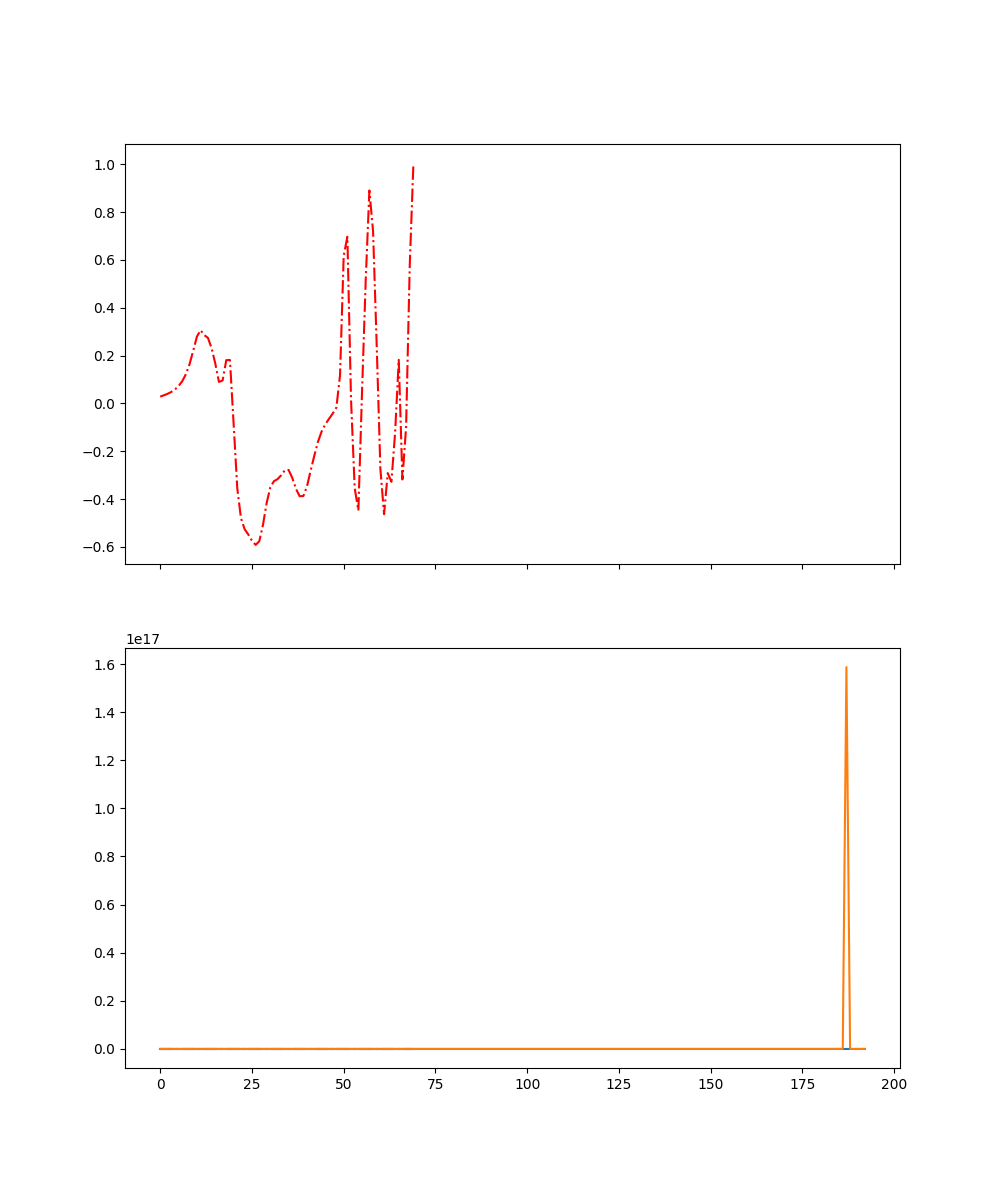

In [19]:
fig, axs = plt.subplots(2,1, figsize=(10, 12), sharex=True)
axs[0].plot(q_tot_train[0,:],'r-.')
# axs[0].plot(q_tot_train[0:1000,69],'b-.')
# axs[1].plot(qphys_train[0:1000,0],'r-.')
axs[1].plot(qphys_train[0,:],'b-.')
# axs[1].plot(theta_phys_train[0:1000,0],'c-.')
# axs[0].plot(theta_train[0:1000,0],'c-.')


In [12]:
dataset_file = "{0}/train_test_data_{1}_raw.hdf5".format(locations["train_test_datadir"],region)
dataset=h5py.File(dataset_file,'r')
       
q_tot_train = dataset["q_tot_train"]
q_tot_adv_train = dataset["q_adv_train"]
theta_train = dataset["air_potential_temperature_train"]
theta_adv_train = dataset["t_adv_train"]
sw_toa_train = dataset["toa_incoming_shortwave_flux_train"]
shf_train = dataset["surface_upward_sensible_heat_flux_train"]
lhf_train = dataset["surface_upward_latent_heat_flux_train"]
theta_phys_train = dataset["t_phys_train"]
qphys_train = dataset["q_phys_train"]
q_tot_test = dataset["q_tot_test"]
q_tot_adv_test = dataset["q_adv_test"]
theta_test = dataset["air_potential_temperature_test"]
theta_adv_test = dataset["t_adv_test"]
sw_toa_test = dataset["toa_incoming_shortwave_flux_test"]
shf_test = dataset["surface_upward_sensible_heat_flux_test"]
lhf_test = dataset["surface_upward_latent_heat_flux_test"]
theta_phys_test = dataset["t_phys_test"]
qphys_test = dataset["q_phys_test"]

<IPython.core.display.Javascript object>


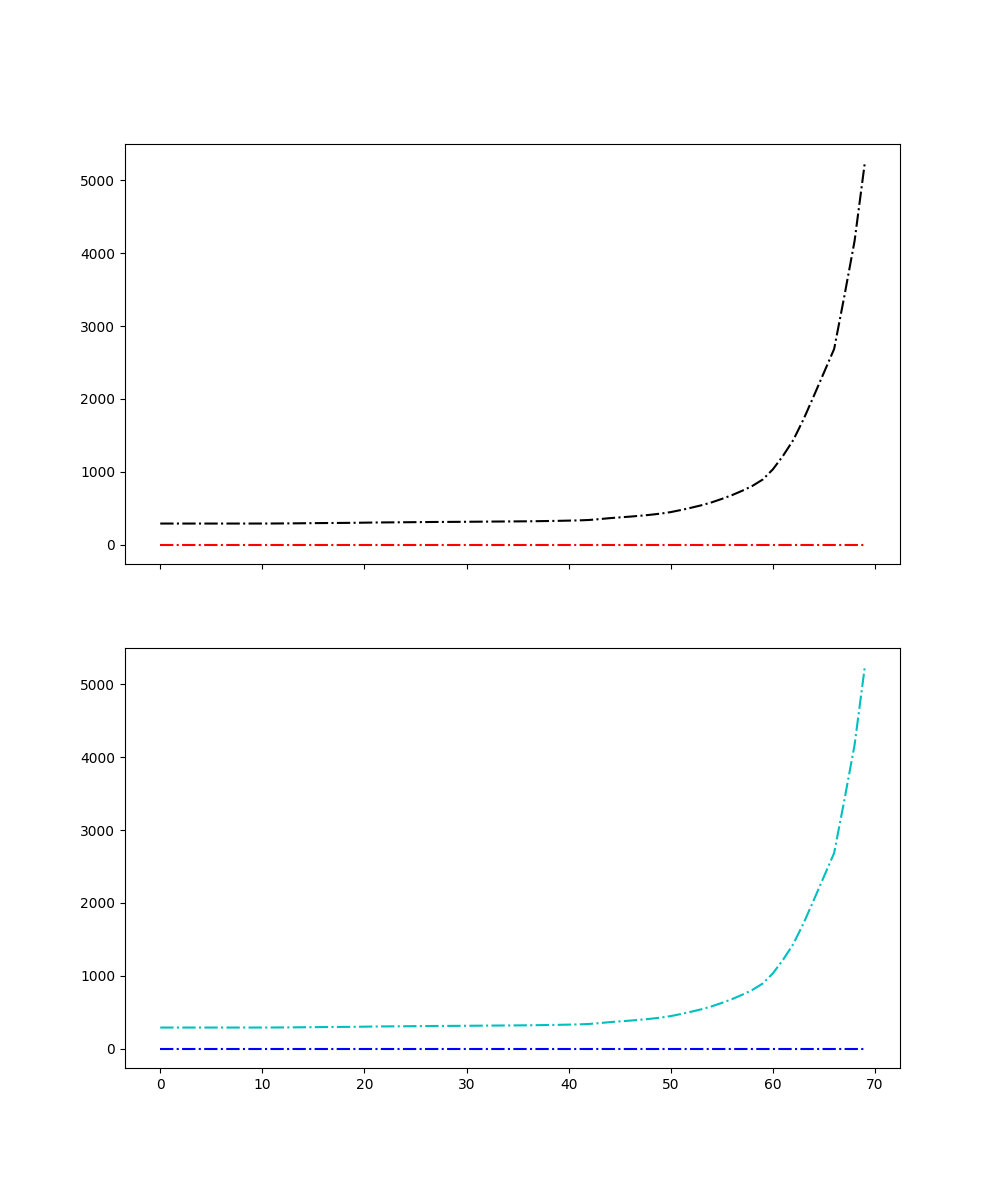

In [16]:
fig, axs = plt.subplots(2,1, figsize=(10, 12), sharex=True)
axs[0].plot(q_tot_train[0,:],'r-.')
axs[0].plot(theta_train[0,:],'k-.')
# axs[0].plot(q_tot_train[0:1000,69],'b-.')
# axs[1].plot(qphys_train[0:1000,1],'r-.')
axs[1].plot(qphys_train[0,:],'b-.')
axs[1].plot(theta_train[0,:],'c-.')


In [34]:
d = np.loadtxt('lr.dat',delimiter=" ")

<IPython.core.display.Javascript object>


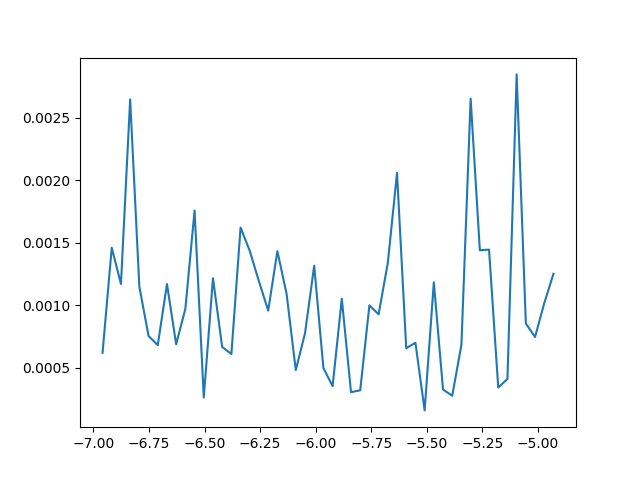

In [37]:
plt.plot(np.log10(d[:50,0]),d[:50,1])

In [27]:
plt.show()